<a href="https://colab.research.google.com/github/loesvanrijswijk/VBTI_copies/blob/main/Build_AE_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building autoencoders in keras

author: Loes van Rijswijk
date: 29-10-21

Questions:

decoder_layer = autoencoder.layers[-1] ##<-- only possible since have 1 layer in decoder NN right?

anwer: no always, use this for the output of decoder model so all steps are covered in this layer?!

# Import

In [ ]:
import keras
from keras import layers
from keras import regularizers


from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## input data

In [ ]:
(x_train,_),(x_test,_) = mnist.load_data()

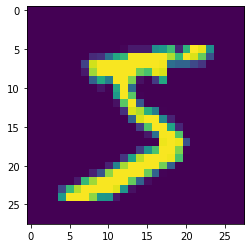

In [ ]:
plt.figure()
plt.imshow(x_train[0])

In [ ]:
# normalize
print(x_train.min(), x_train.max())
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

# flatten the vector
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


0 255


# simple autoencoder

In [ ]:
## define inputs and model

In [ ]:
#size of our encoded representation
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# input image
input_img = keras.Input(shape=(784,))
# encoded reperesnetation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# model that maps input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
# model that maps input to its encoded representation
encoder = keras.Model(input_img, encoded)

## decoder model
# encoded input
encoded_input = keras.Input(shape=(encoding_dim,))
# last layer of autoencoder model
decoder_layer = autoencoder.layers[-1] 
# model that maps the encoded input to the decoded reconstruction
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
# define optimizer and loss function

# per-pixel binary crossentropy loss + Adam
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
## train autoencoder

In [ ]:
autoencoder.fit(x_train,x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = (x_test,x_test))

Epoch 1/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2749 - val_loss: 0.1941
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1744 - val_loss: 0.1559
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1458 - val_loss: 0.1347
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1291 - val_loss: 0.1216
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1185 - val_loss: 0.1130
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1113 - val_loss: 0.1071
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1062 - val_loss: 0.1027
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1025 - val_loss: 0.0997
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0998 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0979 - val_loss: 0.0959

# Adding a sparsity constraint on the encoded representations

add L1 activity regularizer to prevent overfit and can train longer

In [ ]:
encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [ ]:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train,x_train, epochs = 100, batch_size = 256, shuffle = True, validation_data = (x_test,x_test))

Epoch 1/100
235/235 [==============================] - 3s 9ms/step - loss: 0.2832 - val_loss: 0.1993
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1807 - val_loss: 0.1636
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1547 - val_loss: 0.1446
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1396 - val_loss: 0.1326
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1297 - val_loss: 0.1247
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1229 - val_loss: 0.1189
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1179 - val_loss: 0.1145
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1140 - val_loss: 0.1112
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1112 - val_loss: 0.1089
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1093 - val_lo

# Deep autoencoder

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='relu')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 14ms/step - loss: 0.4134 - val_loss: 0.3492
Epoch 2/100
235/235 [==============================] - 3s 13ms/step - loss: 0.3283 - val_loss: 0.2996
Epoch 3/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2936 - val_loss: 0.2824
Epoch 4/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2943 - val_loss: 0.2770
Epoch 5/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2651 - val_loss: 0.2554
Epoch 6/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2527 - val_loss: 0.3110
Epoch 7/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2671 - val_loss: 0.2549
Epoch 8/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2575 - val_loss: 0.2686
Epoch 9/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2588 - val_loss: 0.2690
Epoch 10/100
235/235 [==============================] - 3s 13ms/step - loss: 0.258

# Convolutional autoencoder

# visualization

In [ ]:
# encode and decode some images
#encoded_imgs = encoder.predict(x_test)
#decoded_imgs = decoder.predict(encoded_imgs)

reconstructed = autoencoder.predict(x_test)

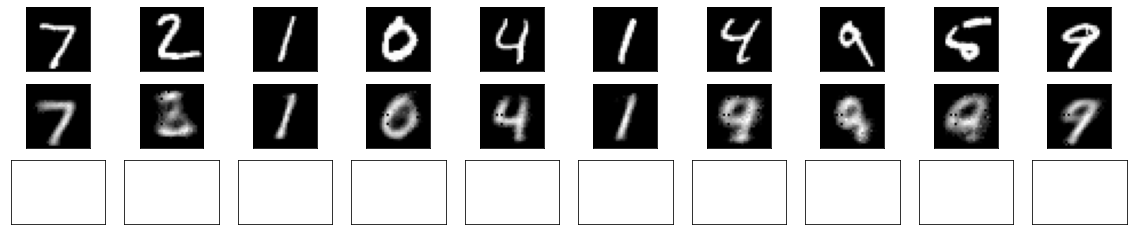

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    #plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()